# Create Figures for Report
Illustrations to compare the two proposed methods - 1) use global model error to fit distribution; 2) use local errors for each region to fit distributions

In [1]:
import numpy as np
import os

# Illustrations using the syngas LHV prediction model as an example

# Define required data
MC_iter = 10000 # define Monte Carlo iterations
directory = os.getcwd()


# Data on errors and boundaries
global_error = 0.600
region_errors =  [0.4762977988051116, 0.8294947455038496, 0.3707010544319724]
boundaries = [6.15988209, 10.14519213]

# Fake predicted values for each region
predictions = [4, 8, 12]

# Draw samples from distributions

# Regional method
regional_low = np.random.normal(loc=predictions[0], scale=region_errors[0], size=MC_iter)
regional_mid = np.random.normal(loc=predictions[1], scale=region_errors[1], size=MC_iter)
regional_high = np.random.normal(loc=predictions[2], scale=region_errors[2], size=MC_iter)

# Global method
global_low = np.random.normal(loc=predictions[0], scale=global_error, size=MC_iter)
global_mid = np.random.normal(loc=predictions[1], scale=global_error, size=MC_iter)
global_high = np.random.normal(loc=predictions[2], scale=global_error, size=MC_iter)


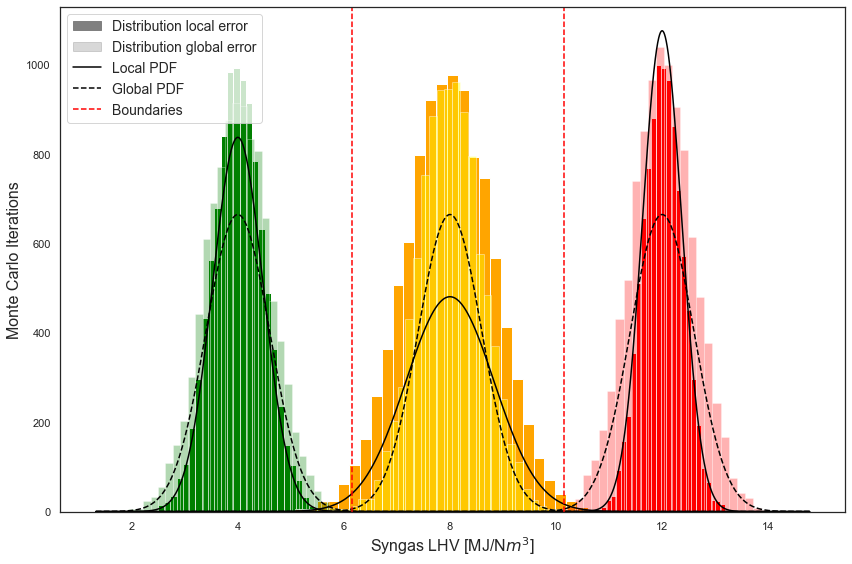

In [15]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set_style(style='white')
# plt.style.use('default')

# Plot scatter plot with boundaries lines
plt.rcParams['figure.figsize'] = (12,8)

fig, ax = plt.subplots()

# Plot regional histograms
plt.hist(regional_low, bins=30, color="green", label="Distribution Region 1")
plt.hist(regional_mid, bins=30, alpha=1, color="orange", label="Distribution Region 2")
plt.hist(regional_high, bins=30, color="red", label="Distribution Region 3")

# Plot global histograms
plt.hist(global_low, bins=30, alpha=0.3, color="green")
plt.hist(global_mid, bins=30, alpha=0.4, color="yellow")
plt.hist(global_high, bins=30, alpha=0.3, color="red")


# Get data to overlay probability distribution functions
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 10000)

# Get regional pdfs
pdf_regional_low = norm.pdf(x, predictions[0], region_errors[0])
pdf_regional_mid = norm.pdf(x, predictions[1], region_errors[1])
pdf_regional_high = norm.pdf(x, predictions[2], region_errors[2])

# Get global pdfs
pdf_global_low = norm.pdf(x, predictions[0], global_error)
pdf_global_mid = norm.pdf(x, predictions[1], global_error)
pdf_global_high = norm.pdf(x, predictions[2], global_error)



# Plot pdfs
# Regional
plt.plot(x, pdf_regional_low*1000, color="black", linewidth=1.5)
plt.plot(x, pdf_regional_mid*1000, color="black", linewidth=1.5)
plt.plot(x, pdf_regional_high*1000, color="black", linewidth=1.5)

# Global
plt.plot(x, pdf_global_low*1000, color="black", linewidth=1.5, linestyle="--")
plt.plot(x, pdf_global_mid*1000, color="black", linewidth=1.5, linestyle="--")
plt.plot(x, pdf_global_high*1000, color="black", linewidth=1.5, linestyle="--")

# Add boundary lines to plot
plt.axvline(x = boundaries[0], color = 'red', linestyle ="--")
plt.axvline(x = boundaries[1], color = 'red', linestyle ="--")

import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt


# Defining artists to create legend
grey_patch = mpatches.Patch(color='grey', label="Distribution local error")
grey_opaque_patch = mpatches.Patch(color='grey', alpha=0.3, label="Distribution global error")

# Alternative could label by colour
# blue_patch = mpatches.Patch(color='blue', label="Distribution Region Error 1")
# green_patch = mpatches.Patch(color='green', label="Distribution Region 2")
# red_patch = mpatches.Patch(color='red', label="Distribution Region 3")

black_solid = mlines.Line2D([], [], color='black', label="Local PDF")
black_dashed = mlines.Line2D([], [], color='black', linestyle="--", label="Global PDF")
red_dashed = mlines.Line2D([], [], color='red', linestyle="--", label="Boundaries")

plt.legend()
plt.legend(handles=[grey_patch, grey_opaque_patch, black_solid, black_dashed, red_dashed], fontsize=14, loc="upper left")

ax.set_ylabel('Monte Carlo Iterations', fontsize=16)
ax.set_xlabel('Syngas LHV [MJ/N$m^{3}$]', fontsize=16)

plt.savefig(directory + r"\\" + r"\figures" + r"\histogram_comparison" + ".tiff", dpi=500, bbox_inches = "tight")
plt.tight_layout()
plt.show()


# Figure comments:
- PDFs are scaled by 1000
- Predicted values of 4, 8, 12 used as example
- Solid colors indicated the distribution using local errors for the region considered
- Opaque colors indicate the distibution using the models global error